# Question D13

*Question*: In general, what languages compose your ML-enabled system projects (including eventually Non-ML related parts)?

*Answer Type*: Multiple Option and Free Field

*Options*: [C/C++, Java, Javascript, Julia, MatLab, Python, R]

### Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from utils.basic import rename_values, format_wordcloud_text
from utils.dataframe import DataframeUtils
from utils.plot import PlotUtils
from utils.bootstrapping import BootstrappingUtils

### Dataframe Init

In [2]:
dataframe_obj = DataframeUtils('./data/main_data.csv', ';', './data/unused_columns.txt', './data/formatted_columns.txt')
# the index is not important, but when we internally format df we need to reset index
dataframe_obj.df = dataframe_obj.df.reset_index(drop=True)

In [3]:
# For PROFES, we discarded suspended submissions (e.g., remove those who didn't complete the survey).
dataframe_obj.df.drop(dataframe_obj.df[dataframe_obj.df['Status'] == 'Suspended (22)'].index, inplace = True)

In [4]:
# question options
languages = {    
    'D13_ML_Programming_Language_C': 'C',
    'D13_ML_Programming_Language_Java': 'Java',
    'D13_ML_Programming_Language_Javascript': 'Javascript',
    'D13_ML_Programming_Language_Julia': 'Julia',
    'D13_ML_Programming_Language_MatLab': 'MatLab',
    'D13_ML_Programming_Language_Python': 'Python',
    'D13_ML_Programming_Language_R': 'R',
}

In [5]:
# special case, where in others column we were able to identify all options and group the related into one option
dataframe_obj.replace_list_values_by_condition('D13_ML_Programming_Language_Others_Free',
                                               ['c#', '.Net Core', '.Net Core, C#'], 
                                               'C#', 'eq')
dataframe_obj.replace_list_values_by_condition('D13_ML_Programming_Language_Others_Free',
                                               ['React JS for visualisations and interaction with the project'], 
                                               'React JS', 'eq')
dataframe_obj.replace_list_values_by_condition('D13_ML_Programming_Language_Others_Free',
                                               ['scala'], 
                                               'Scala', 'eq')
dataframe_obj.replace_list_values_by_condition('D13_ML_Programming_Language_Others_Free',
                                               ['SAS', 'SQL', 'SAS Guide, SAS Miner, Knime, IBM Modeler, SPSS Clementine ', 'Sas', 'sql'], 
                                               'SAS / SQL', 'eq')

### Basic Analysis

In [6]:
dataframe_obj.df[['D13_ML_Programming_Language_C', 'D13_ML_Programming_Language_Java', 'D13_ML_Programming_Language_Javascript', 
    'D13_ML_Programming_Language_Julia', 'D13_ML_Programming_Language_MatLab', 'D13_ML_Programming_Language_Python', 
    'D13_ML_Programming_Language_R', 'D13_ML_Programming_Language_Others', 'D13_ML_Programming_Language_Others_Free']].head()

,D13_ML_Programming_Language_C,D13_ML_Programming_Language_Java,D13_ML_Programming_Language_Javascript,D13_ML_Programming_Language_Julia,D13_ML_Programming_Language_MatLab,D13_ML_Programming_Language_Python,D13_ML_Programming_Language_R,D13_ML_Programming_Language_Others,D13_ML_Programming_Language_Others_Free
0,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,not quoted,-99
1,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,not quoted,not quoted,-99
2,quoted,not quoted,not quoted,not quoted,not quoted,quoted,quoted,not quoted,-99
3,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,not quoted,not quoted,-99
4,not quoted,quoted,not quoted,not quoted,not quoted,quoted,quoted,not quoted,-99


In [7]:
indexes = []
values = []
chart_positions = []
for language in languages:
    indexes.append(languages[language])
    values.append(dataframe_obj.df[language].value_counts()['quoted'])
    chart_positions.append(1 if 'Others' not in language else 0)

In [8]:
dataframe_obj.df['D13_ML_Programming_Language_Others_Free'].value_counts()

D13_ML_Programming_Language_Others_Free
-99                   164
SAS / SQL               8
C#                      7
Scala                   3
Groovy, Postgresql      1
Go                      1
React JS                1
Typescript              1
Python                  1
Name: count, dtype: int64

There is one respondent who informed 'Python' as main programming language in the 'Others' field, despite having this option available. So let's increase the amount of people who informed 'Python' in this field to 'Python' option.

In [9]:
for idx, language in enumerate(indexes):
    if language == 'Python':
        # increase the previous value with the amount of people who informed 'Python' on 'Others' field
        values[idx] = values[idx] + int(dataframe_obj.df['D13_ML_Programming_Language_Others_Free'].value_counts()['Python'])

In [10]:
# add languages present in others column
indexes += ['C#', 'SAS / SQL', 'Groovy, Postgresql', 'Go', 'Typescript', 'Scala', 'React JS']
values += [dataframe_obj.df['D13_ML_Programming_Language_Others_Free'].value_counts()['C#'],
           dataframe_obj.df['D13_ML_Programming_Language_Others_Free'].value_counts()['SAS / SQL'],
           dataframe_obj.df['D13_ML_Programming_Language_Others_Free'].value_counts()['Groovy, Postgresql'],
           dataframe_obj.df['D13_ML_Programming_Language_Others_Free'].value_counts()['Go'],
           dataframe_obj.df['D13_ML_Programming_Language_Others_Free'].value_counts()['Typescript'],
           dataframe_obj.df['D13_ML_Programming_Language_Others_Free'].value_counts()['Scala'],
           dataframe_obj.df['D13_ML_Programming_Language_Others_Free'].value_counts()['React JS']]
chart_positions += [1, 1, 1, 1, 1, 1, 1]

In [11]:
# compute total of unique answers in this question
total = 0
for idx, row in dataframe_obj.df.iterrows():
    
    if row['D13_ML_Programming_Language_C'] == 'quoted' or row['D13_ML_Programming_Language_Java'] == 'quoted' or row['D13_ML_Programming_Language_Javascript'] == 'quoted' or row['D13_ML_Programming_Language_Julia'] == 'quoted' or row['D13_ML_Programming_Language_MatLab'] == 'quoted' or row['D13_ML_Programming_Language_Python'] == 'quoted' or row['D13_ML_Programming_Language_R'] == 'quoted' or row['D13_ML_Programming_Language_Others'] == 'quoted':
        total += 1

total_answers = 'N = ' + str(total)
total_answers_int = total

In [12]:
# plot object
d13_plot = PlotUtils(pd.DataFrame(
    data={'Language': indexes, 'Answers': values, 'Chart Position': chart_positions}
).sort_values(by=['Chart Position', 'Answers'], ascending=False))

C:\Users\Antonio Pedro Alves\.virtualenvs\pfp-antonio-pedro-aVZriNVE\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


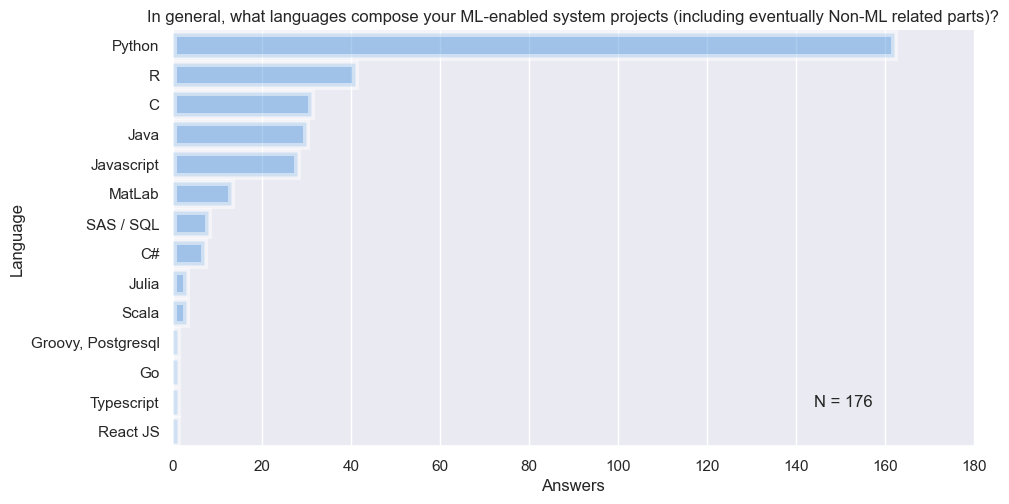

In [13]:
d13_plot.single_barplot(x_axis="Answers", y_axis="Language",
                        title="In general, what languages compose your ML-enabled system projects (including eventually Non-ML related parts)?",
                        x_label="Answers", y_label="Language", x_label_rotation=0, color="#429bf5", total_answers=total_answers)

### Bootstrapping Analysis

In [14]:
prefix = "D13_ML_Programming_Language_"

In [15]:
# the possible answers are the ones in columns
valid_options_list = [language_column.split(prefix)[1] for language_column in languages]

In [16]:
# answers could be composed by more than one option, so we will have an array of selected options
valid_answers_list = []
for idx, row in dataframe_obj.df.iterrows():
    answer = []
    for option in valid_options_list:
        if row[prefix + option] == 'quoted':
            answer.append(option)
            
    # we look for others column to check if there is another valid language to be accepted
    if row['D13_ML_Programming_Language_Others_Free'] != '-99' and row['D13_ML_Programming_Language_Others_Free'] is not np.nan:
        answer.append(row['D13_ML_Programming_Language_Others_Free'])
    
    valid_answers_list.append(answer)

In [17]:
# add others valid languages only once
valid_options_list += list(dataframe_obj.df['D13_ML_Programming_Language_Others_Free'].unique())
valid_options_list = [valid_option for valid_option in valid_options_list 
                      if valid_option != '-99' and valid_option is not np.nan]
valid_options_list = list(set(valid_options_list))

In [18]:
replacements = 1000
population_sample_size = total_answers_int # equals n - total valid answers

bootstrapping_obj = BootstrappingUtils(valid_answers_list, valid_options_list, replacements, population_sample_size, 95)

In [19]:
bootstrapped_dict_data = bootstrapping_obj.bootstrapping(question_type="multiple")

In [20]:
# get a pair of values between dict key and all the list values inside that key 
# key: [val_1, val_2] ---> [(key, val_1), (key, val_2)...]
indexes = []
values = []
chart_positions = []
for idx in bootstrapped_dict_data:
    indexes += [idx for _ in range(len(bootstrapped_dict_data[idx]['population']))]
    values += bootstrapped_dict_data[idx]['population']
    chart_positions += [1 if 'Others' not in idx else 0 for _ in range(len(bootstrapped_dict_data[idx]['population']))]

In [21]:
# plot object for bootstrapped data
d13_boot_plot = PlotUtils(pd.DataFrame(
    data={'Language': indexes, 'Value': values, 'Chart Position': chart_positions}
).sort_values(by=['Chart Position', 'Value'], ascending=False))

C:\Users\Antonio Pedro Alves\.virtualenvs\pfp-antonio-pedro-aVZriNVE\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


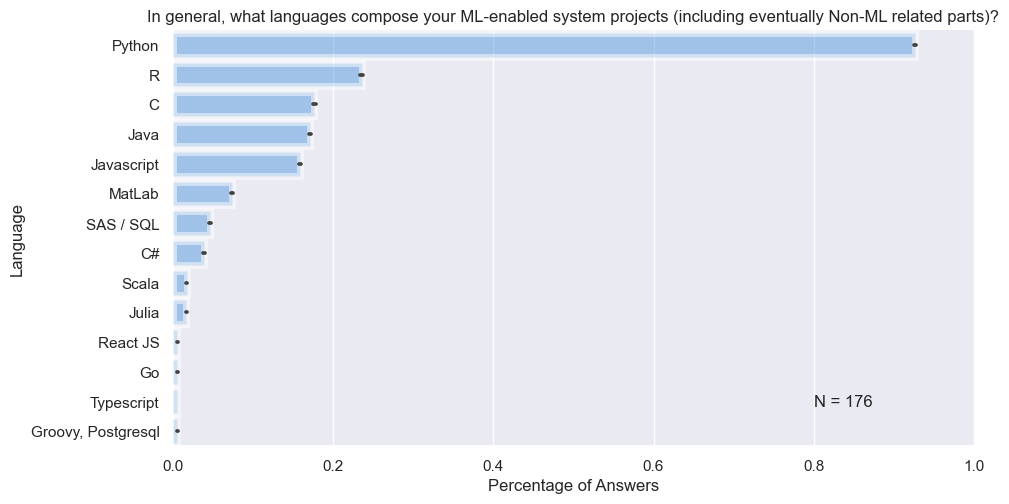

In [22]:
d13_boot_plot.single_barplot(x_axis="Value", y_axis="Language", 
                       title="In general, what languages compose your ML-enabled system projects (including eventually Non-ML related parts)?",
                       x_label="Percentage of Answers", y_label="Language", x_label_rotation=0, color="#429bf5",
                       total_answers=total_answers)

In [23]:
# confidence for each option
print("Option: (Lower Value, Mean, Upper Value)")
for idx in bootstrapped_dict_data:
    print(idx + ':' + str(bootstrapped_dict_data[idx]['confidence']))

Option: (Lower Value, Mean, Upper Value)
R:(0.23363817665339118, 0.23567045454545454, 0.2377027324375179)
Javascript:(0.1571740817836637, 0.15886931818181818, 0.16056455457997265)
Typescript:(0.005208737640858748, 0.005545454545454545, 0.005882171450050343)
C#:(0.03829023926120597, 0.03923295454545454, 0.040175669829703116)
Groovy, Postgresql:(0.005357436217827624, 0.005698863636363637, 0.0060402910548996505)
SAS / SQL:(0.045389730441627425, 0.046397727272727264, 0.0474057241038271)
C:(0.17519406717265754, 0.1768465909090909, 0.1784991146455243)
React JS:(0.005502735016793663, 0.005857954545454546, 0.00621317407411543)
Python:(0.9245862084653459, 0.9258352272727275, 0.9270842460801091)
Scala:(0.016751002934523185, 0.017392045454545455, 0.018033087974567725)
Go:(0.00540243905929635, 0.005744318181818183, 0.006086197304340016)
MatLab:(0.07267615419849684, 0.07393749999999999, 0.07519884580150314)
Julia:(0.016258371103451238, 0.01694318181818182, 0.0176279925329124)
Java:(0.16953335958365

In [24]:
# confidence for each option
print("Option: (Lower Value, Mean, Upper Value)")
for idx in bootstrapped_dict_data:
    print(idx + ':: P = ' + str(round((bootstrapped_dict_data[idx]['confidence'][1] * 100), 3)) + " [" + str(round((bootstrapped_dict_data[idx]['confidence'][0] * 100), 3)) + ", " + str(round((bootstrapped_dict_data[idx]['confidence'][2] * 100), 3)) + "]")

Option: (Lower Value, Mean, Upper Value)
R:: P = 23.567 [23.364, 23.77]
Javascript:: P = 15.887 [15.717, 16.056]
Typescript:: P = 0.555 [0.521, 0.588]
C#:: P = 3.923 [3.829, 4.018]
Groovy, Postgresql:: P = 0.57 [0.536, 0.604]
SAS / SQL:: P = 4.64 [4.539, 4.741]
C:: P = 17.685 [17.519, 17.85]
React JS:: P = 0.586 [0.55, 0.621]
Python:: P = 92.584 [92.459, 92.708]
Scala:: P = 1.739 [1.675, 1.803]
Go:: P = 0.574 [0.54, 0.609]
MatLab:: P = 7.394 [7.268, 7.52]
Julia:: P = 1.694 [1.626, 1.763]
Java:: P = 17.127 [16.953, 17.3]
